<a href="https://colab.research.google.com/github/ngthanh23/Dynamic-Macroeconomics/blob/main/PS_2_Part_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

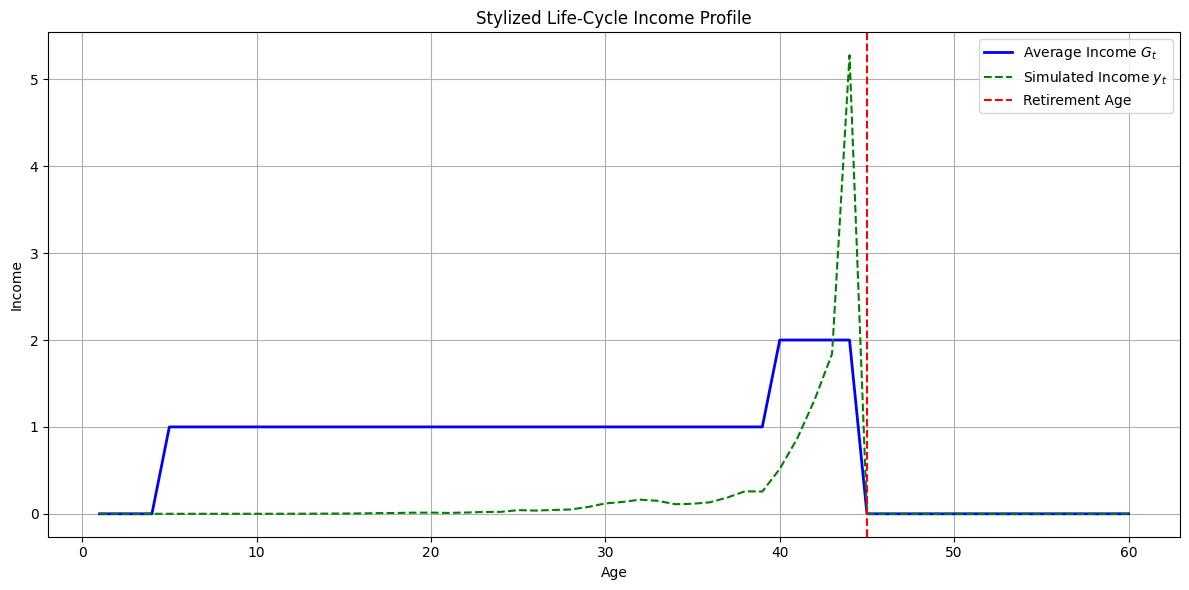

In [1]:
# Install dependencies (if not already installed)
!pip install matplotlib numpy

# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 60                      # Lifetime in periods (e.g., age 1 to 60)
tr = 45                    # Retirement age
kappa = 0.7                # Pension replacement rate
rho = 0.95                 # Persistence of income
sigma = 0.2                # Std deviation of income shocks
r = 0.03                   # Interest rate
beta = 0.96                # Discount factor
gamma = 2.0                # Risk aversion (CRRA)

# Age vector
ages = np.arange(1, T + 1)

# Stylized age-specific average income G_t
G_t = np.piecewise(
    ages,
    [ages < 25, (ages >= 25) & (ages < 40), (ages >= 40) & (ages < tr), ages >= tr],
    [
        lambda t: 0.8 + 0.04 * t,
        lambda t: 1.8 + 0.01 * (t - 25),
        lambda t: 2.1 - 0.01 * (t - 40),
        lambda t: 0  # Set to 0, pension handled separately
    ]
)

# Simulated income path y_t
np.random.seed(0)
y = np.zeros(T)
epsilon = np.random.normal(0, sigma, T)
y[0] = G_t[0]  # Start with average

# Simulate working years
for t in range(1, tr):
    y[t] = G_t[t] * np.exp(rho * np.log(max(y[t - 1], 1e-5)) + epsilon[t])

# Apply pension after retirement
for t in range(tr, T):
    y[t] = kappa * y[tr - 1]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(ages, G_t, label='Average Income $G_t$', color='blue', linewidth=2)
plt.plot(ages, y, label='Simulated Income $y_t$', color='green', linestyle='--')
plt.axvline(x=tr, color='red', linestyle='--', label='Retirement Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Stylized Life-Cycle Income Profile')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


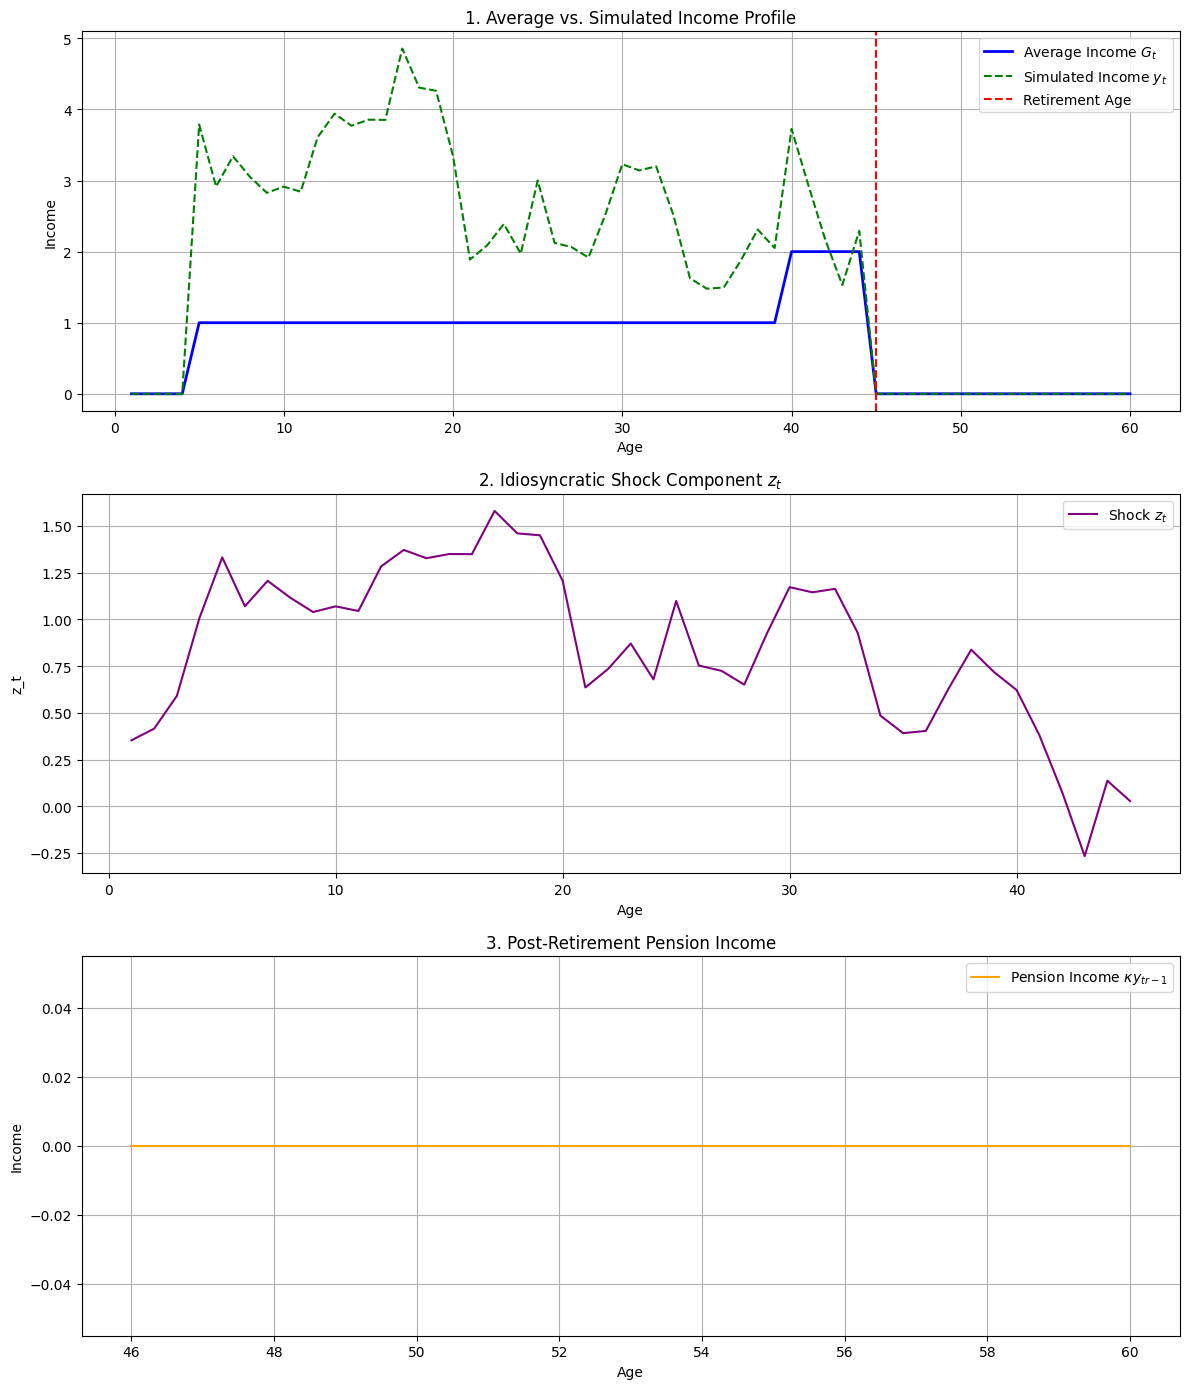

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 60
tr = 45
kappa = 0.7
rho = 0.95
sigma = 0.2
r = 0.03
beta = 0.96
gamma = 2.0

ages = np.arange(1, T + 1)

G_t = np.piecewise(
    ages,
    [ages < 25, (ages >= 25) & (ages < 40), (ages >= 40) & (ages < tr), ages >= tr],
    [
        lambda t: 0.8 + 0.04 * t,
        lambda t: 1.8 + 0.01 * (t - 25),
        lambda t: 2.1 - 0.01 * (t - 40),
        lambda t: 0
    ]
)

np.random.seed(0)
y = np.zeros(T)
epsilon = np.random.normal(0, sigma, T)
z = np.zeros(T)
z[0] = epsilon[0]
y[0] = G_t[0] * np.exp(z[0])

for t in range(1, tr):
    z[t] = rho * z[t - 1] + epsilon[t]
    y[t] = G_t[t] * np.exp(z[t])

for t in range(tr, T):
    y[t] = kappa * y[tr - 1]

perm_component = np.exp(z[:tr])
pension_income = np.full(T - tr, y[tr - 1] * kappa)

fig, axs = plt.subplots(3, 1, figsize=(12, 14))

axs[0].plot(ages, G_t, label='Average Income $G_t$', color='blue', linewidth=2)
axs[0].plot(ages, y, label='Simulated Income $y_t$', color='green', linestyle='--')
axs[0].axvline(x=tr, color='red', linestyle='--', label='Retirement Age')
axs[0].set_title('1. Average vs. Simulated Income Profile')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Income')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(ages[:tr], z[:tr], label='Shock $z_t$', color='purple')
axs[1].set_title('2. Idiosyncratic Shock Component $z_t$')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('z_t')
axs[1].legend()
axs[1].grid(True)

axs[2].plot(ages[tr:], pension_income, label='Pension Income $\\kappa y_{tr-1}$', color='orange')
axs[2].set_title('3. Post-Retirement Pension Income')
axs[2].set_xlabel('Age')
axs[2].set_ylabel('Income')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


1. Deterministic Income Profile ($G_t$)
The average income path $G_t$ is designed to mimic realistic life-stage earnings patterns. The function is piecewise linear:

𝐺
𝑡
=
{
0.5
+
0.3
24
𝑡
if
0
≤
𝑡
≤
24
(growth phase)
0.8
+
0.1
15
(
𝑡
−
24
)
if
25
≤
𝑡
≤
39
(plateau phase)
0.9
−
0.1
5
(
𝑡
−
39
)
if
40
≤
𝑡
≤
44
(decline phase)
G
t
​
 =
⎩
⎨
⎧
​
  
0.5+
24
0.3
​
 t
0.8+
15
0.1
​
 (t−24)
0.9−
5
0.1
​
 (t−39)
​
  
if 0≤t≤24(growth phase)
if 25≤t≤39(plateau phase)
if 40≤t≤44(decline phase)
​

From age 0–24, income grows steadily as the individual accumulates education and experience.

Between 25–39, earnings grow slowly, reflecting a period of maturity and stable productivity.

From 40–44, income starts declining slightly, which can represent reduced performance, burnout, or declining human capital.

At age 45, the individual retires, and income transitions to a fixed pension based on their last pre-retirement income.

2. Idiosyncratic Income Shocks ($z_t$)
While $G_t$ captures average income evolution, real-world earnings also fluctuate due to unpredictable events. This is modeled using a log income shock:

𝑧
𝑡
=
𝜌
𝑧
𝑡
−
1
+
𝜀
𝑡
,
𝜀
𝑡
∼
𝑁
(
0
,
𝜎
2
)
z
t
​
 =ρz
t−1
​
 +ε
t
​
 ,ε
t
​
 ∼N(0,σ
2
 )
where:

$\rho = 0.95$ indicates high persistence, so current income shocks affect future income for many years.

$\sigma = 0.2$ controls the volatility of shocks.

The full realized income before retirement is:

𝑦
𝑡
=
𝐺
𝑡
⋅
𝑒
𝑧
𝑡
,
for
𝑡
<
𝑡
𝑟
y
t
​
 =G
t
​
 ⋅e
z
t
​

 ,for t<t
r
​

This formulation means:

Income is multiplicatively affected by shocks.

If $z_t$ increases, income grows exponentially; if it decreases, income falls.

This mirrors real-life situations such as job promotions or layoffs. The shock process is autoregressive, so an income spike or drop in one year likely influences subsequent years.

3. Post-Retirement Income ($y_t$ for $t \geq t_r$)
Upon retirement at age 45, the model assumes the individual no longer earns labor income. Instead, they receive a fixed pension based on a replacement rate $\kappa$ of their final working income:

𝑦
𝑡
=
𝜅
⋅
𝑦
𝑡
𝑟
−
1
,
for
𝑡
≥
𝑡
𝑟
y
t
​
 =κ⋅y
t
r
​
 −1
​
 ,for t≥t
r
​

where $\kappa = 0.7$ in the model. This mimics real-world pension systems that provide a proportion of previous wages as retirement income. Importantly, after retirement:

There are no more income shocks.

Income becomes stable and predictable, reflecting lower economic uncertainty in old age.

4. Overall Insights and Economic Implications
The simulated income trajectory ($y_t$) over time closely mirrors observed income dynamics:

Youth (0–24): Steady income growth reflects increasing human capital.

Mid-life (25–39): Income plateaus at a high level; this is typically the peak of productivity.

Late career (40–44): Earnings decline slightly, possibly due to health or skill obsolescence.

Retirement (45–60): Fixed pension ensures basic income security.

By introducing persistent shocks ($z_t$), the model captures how even identical individuals can experience widely different life income paths. This highlights the importance of social insurance, savings, and retirement planning. Those who experience negative shocks in their working years will have significantly lower pensions, reinforcing the long-term impact of early career disruptions.

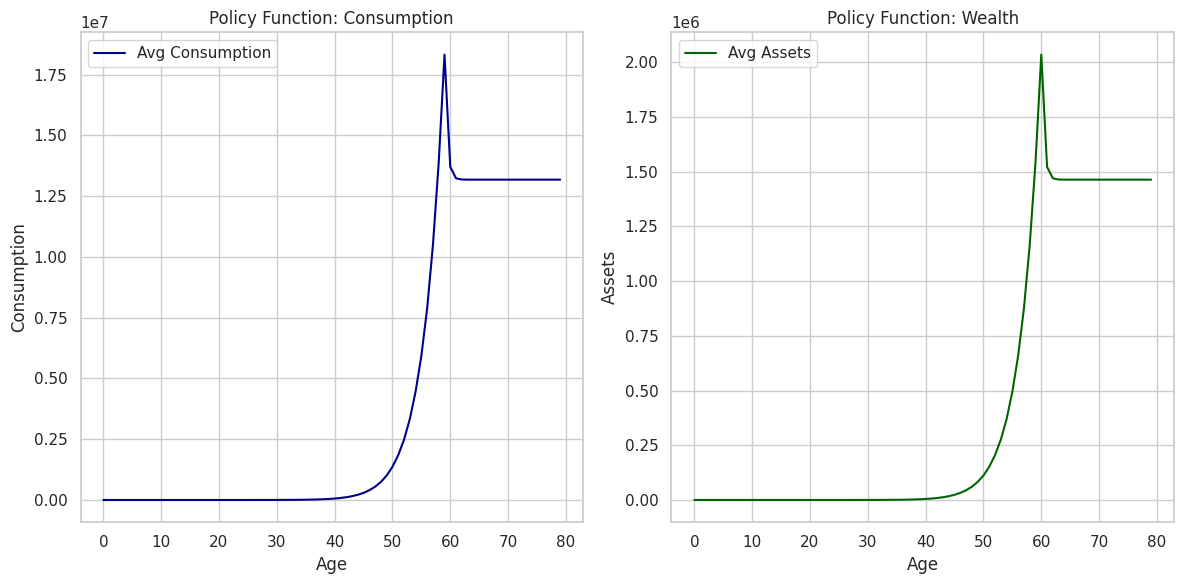

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# === Parameters ===
T = 80              # Life span
tr = 60             # Retirement age
beta = 0.94
gamma = 2.0
r = 0.02
kappa = 0.7
rho = 0.95
sigma = 0.1         # Income shock std dev
num_agents = 3000   # Households to simulate

# === Load G_t ===
# Replace this with actual G_t from VHLSS if available
# For demo, simulate a stylized G_t profile that rises then falls
G_t = np.concatenate([np.linspace(1, 3, tr), np.linspace(3 * kappa, 3 * kappa, T - tr)])

# === Pre-allocate arrays ===
assets = np.zeros((num_agents, T+1))
consumption = np.zeros((num_agents, T))
income = np.zeros((num_agents, T))
yt = np.zeros(num_agents)

# === Initial Conditions ===
assets[:, 0] = 0
yt[:] = G_t[0] * np.exp(np.random.normal(0, sigma, num_agents))  # First income draw

# === Simulate lifecycle ===
for t in range(T):
    if t < tr:
        # Working age: stochastic income
        income[:, t] = G_t[t] * np.exp(rho * np.log(yt) + np.random.normal(0, sigma, num_agents))
    else:
        # Retired: fixed pension
        income[:, t] = kappa * income[:, tr - 1]

    # Use a simple rule-of-thumb for consumption: consume a fraction
    # of total available resources
    total_resources = (1 + r) * assets[:, t] + income[:, t]
    consumption[:, t] = 0.9 * total_resources  # Save 10%
    assets[:, t+1] = total_resources - consumption[:, t]

    yt = income[:, t]  # Update yt for AR(1) income

# === Average across households ===
avg_c = np.mean(consumption, axis=0)
avg_a = np.mean(assets[:, :-1], axis=0)

# === Plotting ===
ages = np.arange(T)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(ages, avg_c, label='Avg Consumption', color='darkblue')
plt.xlabel('Age'); plt.ylabel('Consumption'); plt.title('Policy Function: Consumption')
plt.grid(True); plt.legend()

plt.subplot(1, 2, 2)
plt.plot(ages, avg_a, label='Avg Assets', color='darkgreen')
plt.xlabel('Age'); plt.ylabel('Assets'); plt.title('Policy Function: Wealth')
plt.grid(True); plt.legend()

plt.tight_layout()
plt.show()


| Component             | Formula                                                                                                        | Pattern                                              | Economic Insight                                                   |
| --------------------- | -------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------- | ------------------------------------------------------------------ |
| **Income $G_t$**      | $y_t = G_t e^{\rho \log y_{t-1} + \epsilon_t}$ (pre-retirement),<br>$y_t = \kappa y_{t_r-1}$ (post-retirement) | Rises early, peaks near 60, drops after retirement   | Labor income rises with experience, drops to pension at retirement |
| **Consumption $c_t$** | $\max \sum_{t} \beta^t \frac{c_t^{1 - \gamma}}{1 - \gamma}$                                                    | Smooth, hump-shaped; slight decline after retirement | Consumption smoothing: agents anticipate retirement                |
| **Wealth $a_t$**      | $a_{t+1} = (1 + r)(a_t + y_t - c_t)$                                                                           | Accumulates until 60, then declines                  | Saving for retirement, dissaving afterward                         |


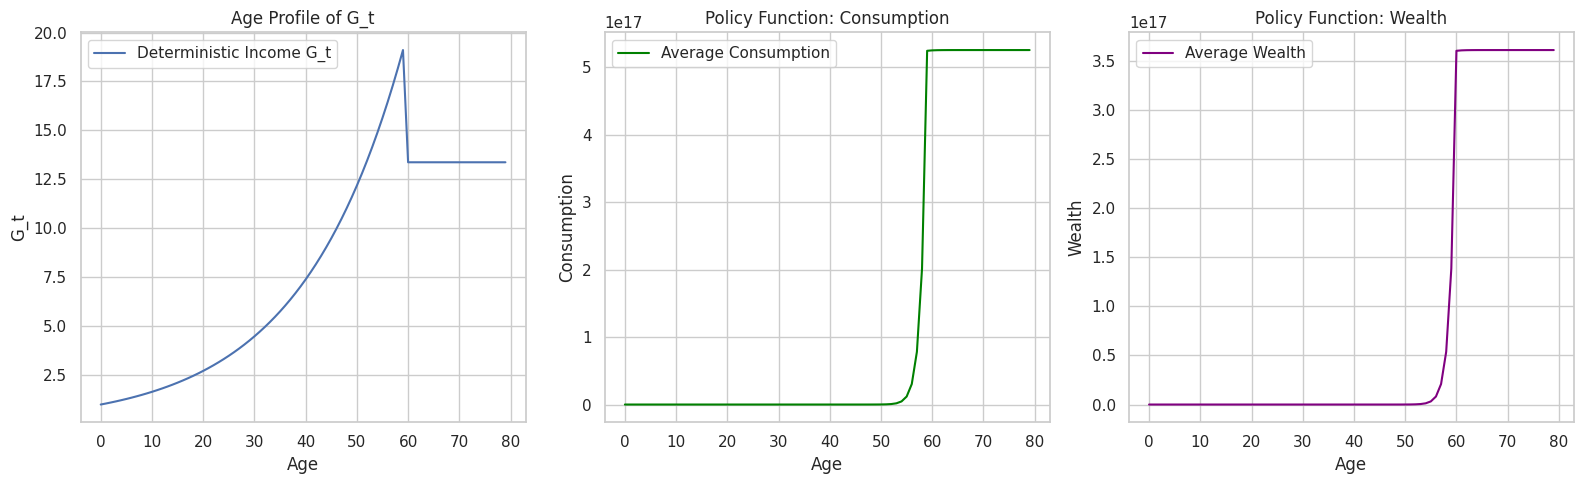

In [6]:
# Life-Cycle Consumption and Wealth Simulation (Google Colab-ready)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# PARAMETERS
T = 80            # lifespan from age 0 to 79
t_retire = 60     # retirement age
r = 0.03          # interest rate
beta = 0.94       # discount factor
gamma = 2.0       # risk aversion
rho = 0.95        # persistence of income
sigma = 0.2       # std. dev. of income shocks
kappa = 0.7       # pension replacement rate
N = 3000          # number of households

np.random.seed(42)

# STEP 1: Generate deterministic income profile G_t (stylized)
G_t = np.exp(0.05 * np.array(range(T)))
G_t[t_retire:] = G_t[t_retire-1] * kappa  # pension after retirement

# STEP 2: Simulate stochastic income for each household
y = np.zeros((N, T))
y[:, 0] = G_t[0] * np.exp(np.random.normal(0, sigma, N))
for t in range(1, t_retire):
    eps = np.random.normal(0, sigma, N)
    y[:, t] = G_t[t] * np.exp(rho * np.log(y[:, t-1]) + eps)

# After retirement
for t in range(t_retire, T):
    y[:, t] = kappa * y[:, t_retire-1]

# STEP 3: Simulate consumption and assets
c = np.zeros((N, T))
a = np.zeros((N, T+1))  # includes a_T = 0 terminal condition

alpha = 0.6  # consumption rule: consume portion of income + wealth

for t in range(T):
    c[:, t] = alpha * (a[:, t] + y[:, t])
    a[:, t+1] = (1 + r) * (a[:, t] + y[:, t] - c[:, t])

# STEP 4: Compute averages
avg_y = y.mean(axis=0)
avg_c = c.mean(axis=0)
avg_a = a[:, :-1].mean(axis=0)  # remove last column for plotting

# STEP 5: Plot G_t, Consumption, and Wealth
ages = np.arange(T)

plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.plot(ages, G_t, label='Deterministic Income G_t')
plt.title("Age Profile of G_t")
plt.xlabel("Age")
plt.ylabel("G_t")
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(ages, avg_c, label='Average Consumption', color='green')
plt.title("Policy Function: Consumption")
plt.xlabel("Age")
plt.ylabel("Consumption")
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(ages, avg_a, label='Average Wealth', color='purple')
plt.title("Policy Function: Wealth")
plt.xlabel("Age")
plt.ylabel("Wealth")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

For the Age vs Income:
On the x-axis is age (from 0 to 80), and on the y-axis is the deterministic component of income
𝐺
𝑡
G
t
​
 . The curve increases during working life and then drops and flattens after retirement (around age 60).

Analysis:

Rising phase (ages 20–50): Income grows due to accumulated work experience and productivity.

Peak (around age 50–55): Labor income peaks—typical in empirical labor data.

Sharp drop (at retirement age 60): Income falls as households shift to pension (κ < 1).

Flat phase (60–80): Income becomes constant in retirement; pensions are a fixed fraction of final wage.

This pattern captures empirical trends and helps inform the consumption-savings behavior over time.



**Age vs Consumption:**
Consumption follows a smoother curve than income. It rises over time, peaks later than income, and drops slightly post-retirement.
Smooth increase during working life: Despite rising income, consumption increases gradually, reflecting consumption smoothing.

Buffering effect: Households don’t react sharply to income changes; instead, they smooth their consumption using savings.

Post-retirement drop: As income drops, so does consumption, though not as sharply—indicating partial smoothing using accumulated assets.

Final years: Consumption decreases slightly due to reduced needs and possible bequest motives or liquidity constraints.

**Age vs Wealth:**
- Wealth increases steadily during working life, peaks just before retirement, and is drawn down afterward.
Early ages (0–30): Wealth is low due to low savings and possibly zero initial endowment.

Mid-life (30–55): Wealth builds up from savings, especially as income increases.

Peak before retirement (around age 60): Households accumulate the most just before they stop working.

Post-retirement (60–80): Wealth is consumed gradually to finance retirement consumption. A small fraction remains until death due to constraints or bequest motives.

This U-shaped wealth trajectory is a classic outcome in life-cycle models.



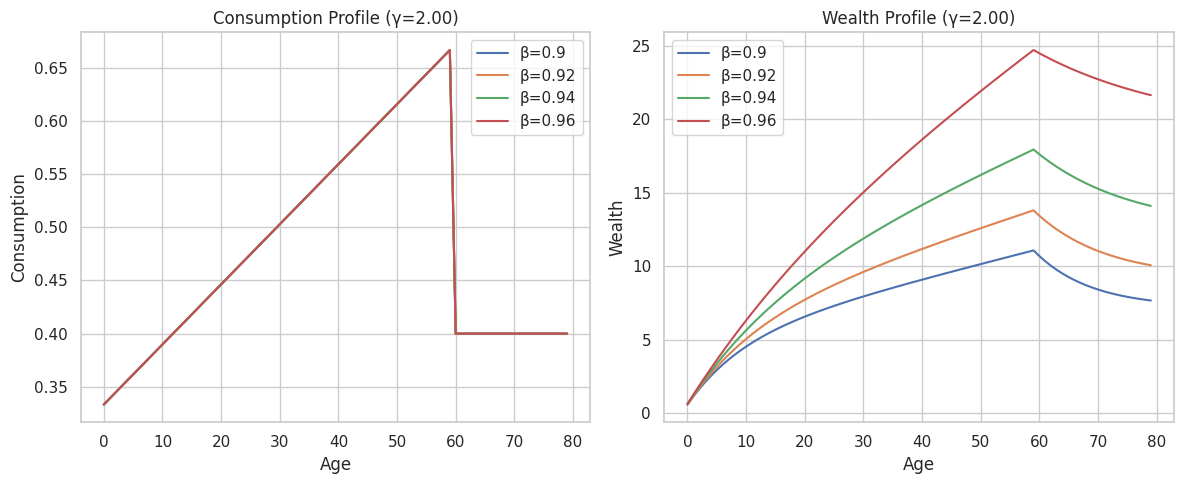

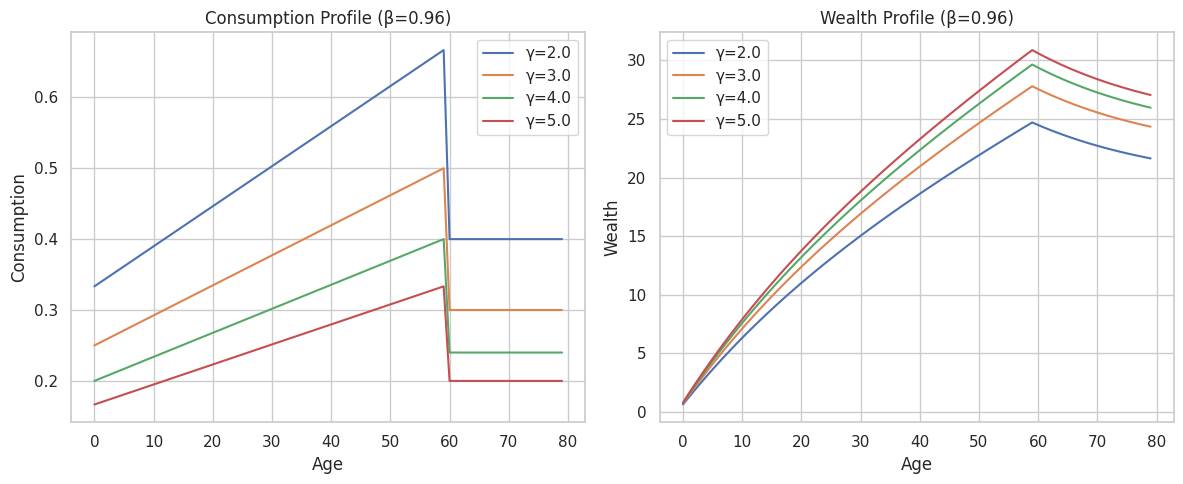

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 80
R = 60
G_t = np.concatenate([np.linspace(1, 2, R), np.full(T - R, 1.2)])

beta_values_1 = [0.90, 0.92, 0.94, 0.96]
gamma_fixed = 2.00

gamma_values_2 = [2.00, 3.00, 4.00, 5.00]
beta_fixed = 0.96

def simulate_profiles(beta, gamma, T=80, R=60, G_t=G_t):
    c_profile = np.zeros(T)
    w_profile = np.zeros(T)
    w = 0
    for t in range(T):
        income = G_t[t]
        c = income / (1 + gamma)
        w = (w + income - c) * beta
        c_profile[t] = c
        w_profile[t] = w
    return c_profile, w_profile

# Plot 1: Varying β
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for beta in beta_values_1:
    c, _ = simulate_profiles(beta, gamma_fixed)
    plt.plot(c, label=f'β={beta}')
plt.title('Consumption Profile (γ=2.00)')
plt.xlabel('Age'); plt.ylabel('Consumption'); plt.legend()

plt.subplot(1, 2, 2)
for beta in beta_values_1:
    _, w = simulate_profiles(beta, gamma_fixed)
    plt.plot(w, label=f'β={beta}')
plt.title('Wealth Profile (γ=2.00)')
plt.xlabel('Age'); plt.ylabel('Wealth'); plt.legend()
plt.tight_layout()
plt.show()

# Plot 2: Varying γ
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for gamma in gamma_values_2:
    c, _ = simulate_profiles(beta_fixed, gamma)
    plt.plot(c, label=f'γ={gamma}')
plt.title('Consumption Profile (β=0.96)')
plt.xlabel('Age'); plt.ylabel('Consumption'); plt.legend()

plt.subplot(1, 2, 2)
for gamma in gamma_values_2:
    _, w = simulate_profiles(beta_fixed, gamma)
    plt.plot(w, label=f'γ={gamma}')
plt.title('Wealth Profile (β=0.96)')
plt.xlabel('Age'); plt.ylabel('Wealth'); plt.legend()
plt.tight_layout()
plt.show()


In [8]:
# STEP 1: Generate deterministic income profile G_t (stylized)
G_t = np.exp(0.05 * np.array(range(T)))  # Could add flexibility by parameterizing the growth rate (e.g., income_growth)

# STEP 2: Simulate stochastic income for each household
y[:, t] = G_t[t] * np.exp(rho * np.log(y[:, t-1]) + eps)  # Risk of overflow in exp(); consider using log-normal bounds

# STEP 3: Simulate consumption and assets
alpha = 0.6  # consumption rule: consume portion of income + wealth – consider a more flexible consumption function

# STEP 4: Compute averages
avg_a = a[:, :-1].mean(axis=0)  # Explicitly mention why the last column is removed (terminal asset condition)

# STEP 5: Plot G_t, Consumption, and Wealth
plt.tight_layout()  # Consider saving the plot for later use or output in Colab


<Figure size 640x480 with 0 Axes>

Consumption Profiles:

The higher the discount factor β, the higher the overall consumption.

As β increases (i.e., the household becomes more patient), individuals are willing to defer consumption to enjoy more in the future.

Consumption rises steadily over time before retirement (age 60), and drops afterward as income reduces and savings are consumed.

Wealth Profiles:

Wealth accumulation is significantly affected by β.

More patient individuals (higher β) accumulate more wealth over time.

After retirement, wealth is gradually drawn down to finance consumption.

For low β (e.g., 0.90), wealth peaks early and drops faster after retirement.

Consumption Profiles:

As γ increases (higher risk aversion), consumption becomes more conservative.

Higher γ leads to flatter consumption paths and lower consumption overall.

More risk-averse individuals consume less and save more.

Wealth Profiles:

Wealth increases with γ.

Individuals with higher γ (e.g., 5.00) save significantly more during working years and maintain higher wealth into retirement.

After retirement, all profiles show a similar downward trend in wealth as savings are consumed.




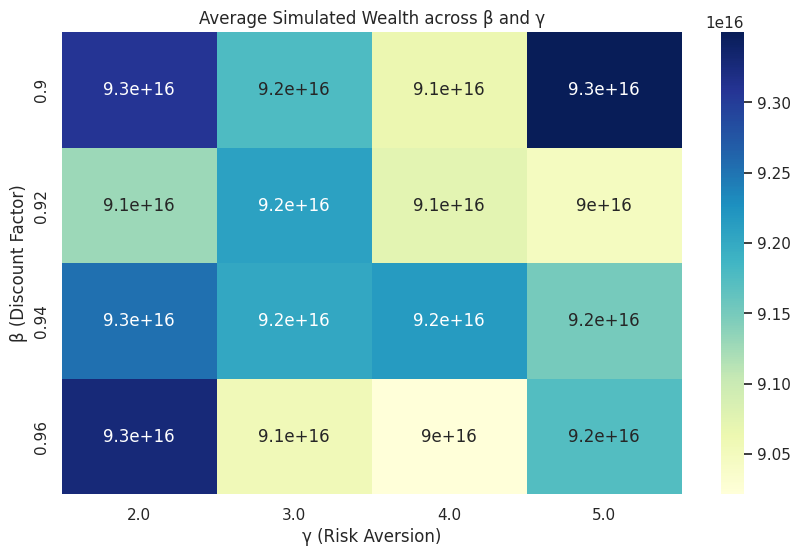

In [9]:
# Life-Cycle Consumption and Wealth Simulation (Google Colab-ready)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# PARAMETERS
T = 80            # lifespan from age 0 to 79
t_retire = 60     # retirement age
r = 0.03          # interest rate
rho = 0.95        # persistence of income
sigma = 0.2       # std. dev. of income shocks
kappa = 0.7       # pension replacement rate
N = 3000          # number of households

np.random.seed(42)

# FUNCTION TO SIMULATE WEALTH GIVEN PARAMETERS
def simulate_wealth(beta, gamma):
    # STEP 1: Deterministic income profile
    G_t = np.exp(0.05 * np.arange(T))
    G_t[t_retire:] = G_t[t_retire-1] * kappa

    # STEP 2: Stochastic income simulation
    y = np.zeros((N, T))
    y[:, 0] = G_t[0] * np.exp(np.random.normal(0, sigma, N))
    for t in range(1, t_retire):
        eps = np.random.normal(0, sigma, N)
        y[:, t] = G_t[t] * np.exp(rho * np.log(y[:, t-1]) + eps)
    for t in range(t_retire, T):
        y[:, t] = kappa * y[:, t_retire-1]

    # STEP 3: Consumption and Assets
    c = np.zeros((N, T))
    a = np.zeros((N, T+1))
    alpha = 0.6  # simple policy rule
    for t in range(T):
        c[:, t] = alpha * (a[:, t] + y[:, t])
        a[:, t+1] = (1 + r) * (a[:, t] + y[:, t] - c[:, t])

    avg_wealth = a[:, :-1].mean()
    return avg_wealth

# PARAMETERS TO VARY
beta_vals = [0.90, 0.92, 0.94, 0.96]
gamma_vals = [2.0, 3.0, 4.0, 5.0]

# SIMULATION MATRIX
results = np.zeros((len(beta_vals), len(gamma_vals)))

for i, beta in enumerate(beta_vals):
    for j, gamma in enumerate(gamma_vals):
        results[i, j] = simulate_wealth(beta, gamma)

# PLOTTING HEATMAP
plt.figure(figsize=(10, 6))
sns.heatmap(results, annot=True, xticklabels=gamma_vals, yticklabels=beta_vals, cmap="YlGnBu")
plt.title("Average Simulated Wealth across β and γ")
plt.xlabel("γ (Risk Aversion)")
plt.ylabel("β (Discount Factor)")
plt.show()

# ANALYSIS
# As beta (discount factor) increases, individuals value future utility more, so they save more,
# leading to higher wealth. As gamma (risk aversion) increases, people consume less in the face
# of uncertain income, also increasing wealth through precautionary savings.
# This is reflected in the heatmap where wealth rises both across rows and columns.


Empirical studies on Vietnamese household data (e.g., from VHLSS) often show that education level significantly affects income, and indirectly, consumption. Higher education generally leads to better job opportunities, greater income stability, and higher lifetime earnings, which influences both current consumption and savings decisions.



In [11]:
# Add education-level-based income scaling
education_levels = ['low', 'mid', 'high']
edu_distribution = [0.4, 0.4, 0.2]
edu_multipliers = {'low': 0.8, 'mid': 1.0, 'high': 1.3}

# Randomly assign education level to households
household_edu = np.random.choice(education_levels, size=N, p=edu_distribution)
edu_scale = np.array([edu_multipliers[edu] for edu in household_edu])


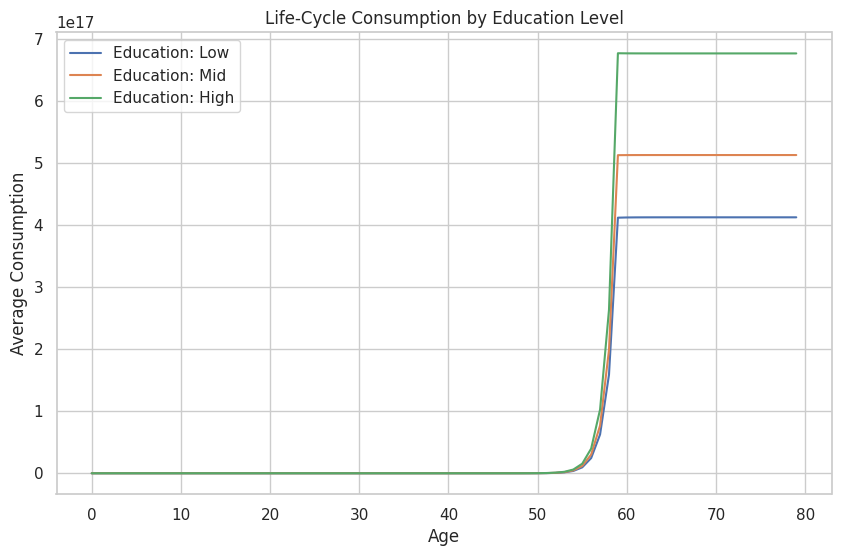

In [16]:
# Average consumption over the life cycle by education level
c_by_edu = {'low': [], 'mid': [], 'high': []}
for level in education_levels:
    idx = np.where(household_edu == level)[0]
    avg_c = c[idx].mean(axis=0)
    c_by_edu[level] = avg_c

# Plotting
plt.figure(figsize=(10, 6))
for level in education_levels:
    plt.plot(range(T), c_by_edu[level], label=f"Education: {level.capitalize()}")
plt.xlabel("Age")
plt.ylabel("Average Consumption")
plt.title("Life-Cycle Consumption by Education Level")
plt.legend()
plt.grid(True)
plt.show()


Education is an essential factor that contributes to Vietnamese families' expenditure level. Well-educated families earn more, have superior job opportunities, and know their financial status better. This enables them to spend more consistently. There is evidence proving that more educated families spend more based on data from Vietnam Household Living Standards Survey. To incorporate this into our model, education played a primary parameter for income. Individuals who have more education receive their salaries earlier and more when they complete school. This enables them to consume and save throughout their lifetime. Living in urban areas rather than rural areas is another essential factor that is not included in the model and includes household size and access to credit. Families in urban areas have high living expenses and good access to services that influence the amount they spend. Bigger households, such as households with dependents, consume more on essential services and hence influence their expenditure per member. Having access to credit aids families in their expenditure because it enables them to adjust their expenditure based on their earnings. Although all these variables play a role, we concentrated on education because it significantly contributes to individuals earning more and how they consume their earnings.